# 线性回归实战项目

* 数据下载 [点击这里](https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

np.set_printoptions(suppress=True)

## Step.1 导入数据

In [13]:
path = 'data/project1_data.csv'
pd_data = pd.read_csv(path)
pd_data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


## Step.2 数据处理

In [14]:
pd_data.keys()

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [16]:
pd_data.shape

(3577296, 87)

In [17]:
Ori_Datas = pd_data.loc[:,['Protocol', 'Flow.Duration','Total.Fwd.Packets', 'Total.Backward.Packets',
                           'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets','Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
                           'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
                           'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
                           'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
                           'Flow.Packets.s']]

In [18]:
Ori_Datas.shape

(3577296, 16)

In [19]:
Datas = Ori_Datas.to_numpy()

In [20]:
Datas[0]

array([      6.        ,   45523.        ,      22.        ,
            55.        ,     132.        ,  110414.        ,
             6.        ,       6.        ,       6.        ,
             0.        ,    4380.        ,    1187.        ,
          2007.52727273,     768.48168861, 2428354.89752433,
          1691.45267228])

In [21]:
V_min = Datas.min(0)[-1]
V_max = Datas.max(0)[-1]
Datas = (Datas - Datas.min(0)) / (Datas.max(0) - Datas.min(0))

In [22]:
Datas[0]

array([0.35294118, 0.00037935, 0.00004634, 0.00010144, 0.00000019,
       0.00008204, 0.00018275, 0.0003736 , 0.0003736 , 0.        ,
       0.11634084, 0.09108349, 0.15404598, 0.09110842, 0.00016868,
       0.00028191])

In [23]:
V_min

0.016666666899999998

In [25]:
V_max

6000000.0

In [26]:
Datas = Datas[0:9000]

In [27]:
np.save('data/project_1.npy', Datas)

## Checkpoint

* 保存数据为 project_1.npy

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

np.set_printoptions(suppress=True)

Datas = np.load('data/project_1.npy')
Datas.shape

(9000, 16)

## Step.3 数据集划分

In [35]:
V_min = 0.017
V_max = 6000000.0

train_x = Datas[0:60,0:-1]
train_y = Datas[0:60,-1]
test_x = Datas[60:90,:-1]
test_y = Datas[60:90,-1]

## Step.4 建立模型并完成训练

In [36]:
model = linear_model.LinearRegression()
model.fit(train_x, train_y)
model.score(train_x, train_y)

0.4298585259360528

## Step.5 测试与可视化

In [38]:
model.score(test_x, test_y)

-0.2076255416522279

In [39]:
predict = model.predict(test_x)
predict.shape

(30,)

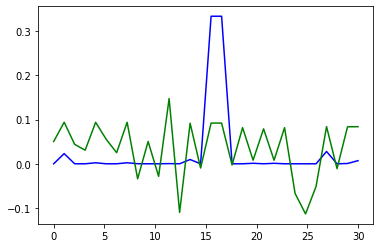

In [40]:
plt_x = np.linspace(0,predict.shape[0],predict.shape[0])
plt.plot(plt_x,test_y,'b')
plt.plot(plt_x,predict,'g')
plt.show()

In [41]:
result = predict * (V_max - V_min) + V_min

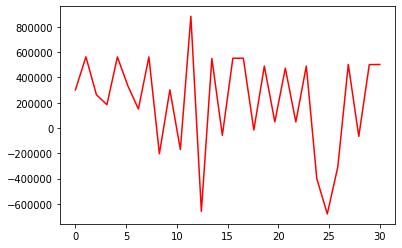

In [42]:
plt.plot(plt_x, result,'r')

In [46]:
ori_target = Ori_Datas.loc[:,'Flow.Packets.s'].to_numpy()[60:90]

In [47]:
ori_target.shape

(30,)

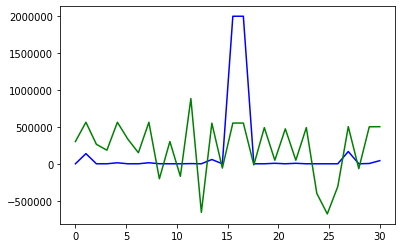

In [48]:
plt.plot(plt_x,ori_target,'b')
plt.plot(plt_x,result,'g')
plt.show()